# Beginner's Python—Session Two Biochemistry Answers

## **Colour and Conjugation**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
from sklearn.metrics import r2_score

A human eye can detect wavelengths of light between 380 to 740 nanometers, this range of wavelengths is classed as visible light. Materials appear to us as the colours that they reflect, meaning the remainng <span style="color:#FF200F">c</span><span style="color:#FF820F">o</span><span style="color:#FFC80F">l</span><span style="color:#A2F80F">o</span><span style="color:#4682E2">u</span><span style="color:#3B2FCE">r</span><span style="color:#FF0095">s</span> are absorbed by the material. Below is a diagram depicting the wavelength's of light (in metres) and their corresponding colours.

<center><img src="./session_two_files/spectrum.png" width="450" align="center"/> 

<center><img src="./session_two_files/chlorophyll_structure.svg" width="200" align="center"/> 

Displayed above, is the molecule **chlorophyll** $\boldsymbol{a}$. It is an essential molecule for photosynthetic organisms, and drives photosynthesis by absorbing light, converting it into energy via electron transfer. Perhaps it is most well known for its characteristic <span style="color:#259B13">green</span> colour, which we see in plants, trees and grass.

 #### **Task 1**

## **Michaelis–Menten kinetics**

If you want to find out more about Michaelis-Menten kinetics head over to https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

$$rate =    \frac{d[P]}{dt}                  = \frac{V_{max}[S]}{K_{M}+[S]} $$

 #### **Task 2**


Please run the cell below

**NOTE:** Do not worry about the code below, we will only be using its output.

Fitted Constants:- 
KM: 29.710582955127755 
Vmax: 0.7972991564434925


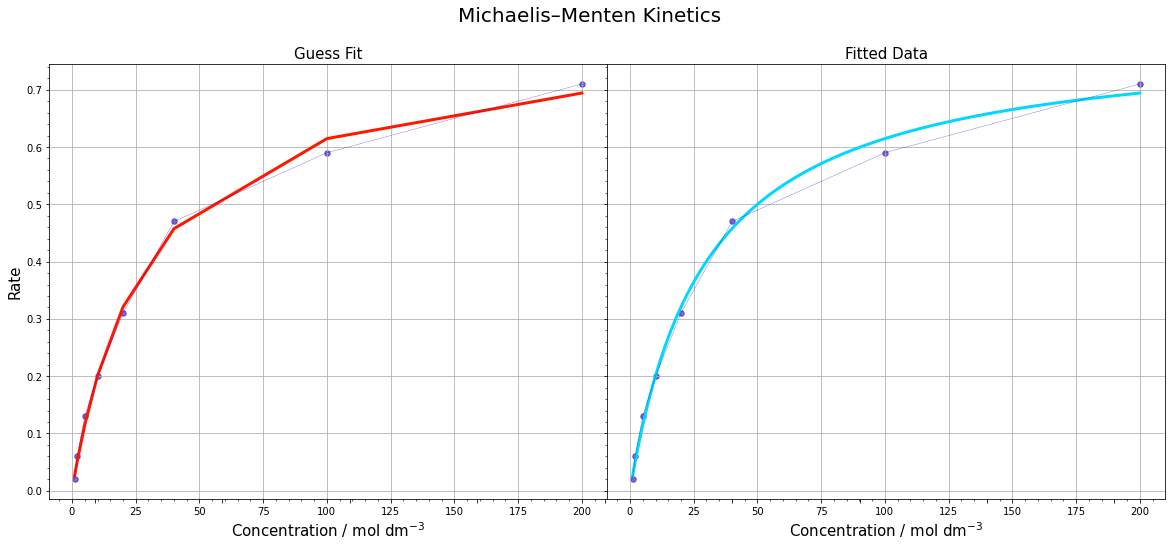

In [11]:
#Run this cell (Shift+Enter)
#import a useful fitting package
from scipy.optimize import curve_fit

#Label and isolate the raw data
conc = np.array([1.0,2.0,5.0,10.0, 20.0, 40.0, 100.0, 200.0])
rate = np.array([0.02,0.06,0.13,0.2,0.31,0.47,0.59,0.71])

#Michaelis-Menten Kinetics equation inputted as a function
def rate_opt(c, km, vmax):
    return (c*vmax)/(km+c)

#make guesses for constants
g = [30,0.9]
n = len(conc)
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], g[0], g[1])
    
#Run function through curve_fit operation (non-linear regression)
k,cov = curve_fit(rate_opt,conc,rate, g)
print("Fitted Constants:-","\nKM:", k[0], "\nVmax:", k[1])
#use calculated constants for an improved fit
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], k[0], k[1])
    
#Michaelis-Menten Kinetics equation inputted as a function    
def rate_smooth(s,km,vmax):
    return (s*vmax)/(km+s)

#create a new array using a larger number of inputs and the optimised constants for a smooth line output
base = np.linspace(1, 200, 400)
p = np.empty(400)
p_len = len(p)
for i in range(p_len):
    p[i] = rate_smooth(base[i],k[0],k[1])

#plot the figure   
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8),sharey=True,gridspec_kw={'wspace': 0})
fig.suptitle('Michaelis–Menten Kinetics',fontsize=20)

#Create the gridlines
ax3 = fig.add_subplot(111, zorder=-1)
for _, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(labelleft=False, labelbottom=False, left=False, right=False )
ax3.get_shared_x_axes().join(ax3,ax1)
ax3.grid(axis="x")
ax1.grid()
ax2.grid()

#Plot Raw Data
ax1.set_title('Guess Fit',fontsize=15)
ax1.plot(conc,y,c='#FF1800',lw=3)
ax1.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax1.scatter(conc,rate,s=30,c='#2909B9',alpha=0.6,label='Raw Data')
ax1.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=15)
ax1.set_ylabel('Rate',fontsize=15)
ax1.minorticks_on()

#Plot Fitted Data
ax2.plot(base,p,lw=3,c='#02D7FF',label='"Test"')
ax2.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax2.scatter(conc,rate,s=30,c='#2909B9',alpha=0.6,label='Raw Data')
ax2.set_title('Fitted Data',fontsize=15)
ax2.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=15)
ax2.minorticks_on()

In [98]:
print(r2_score(rate,y))

0.9967217459700304


In [101]:
print("The maximum theoretical rate predicted is", round(max(p),5), "and the maximum rate measured was", round(max(rate),5))

The maximum theoretical rate predicted is 0.69418 and the maximum rate measured was 0.71


 ### **Task 2**

 ### **Task 3**